In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import statsmodels.api as sm
import os
plt.style.use('ggplot')

In [2]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
#import data
df_435 = pd.read_csv('385.csv', sep = ',')
df_435 = df_435.set_index('время')
df_435 = df_435
df_435

,газ,масла,смолы,асфальтены,кокс
время,,,,,
0,0.00,0.55,0.37,0.09,0.00
30,0.03,0.53,0.32,0.11,0.01
60,0.05,0.54,0.27,0.12,0.01
90,0.05,0.59,0.23,0.12,0.01
120,0.04,0.59,0.23,0.13,0.01


<AxesSubplot:xlabel='время'>

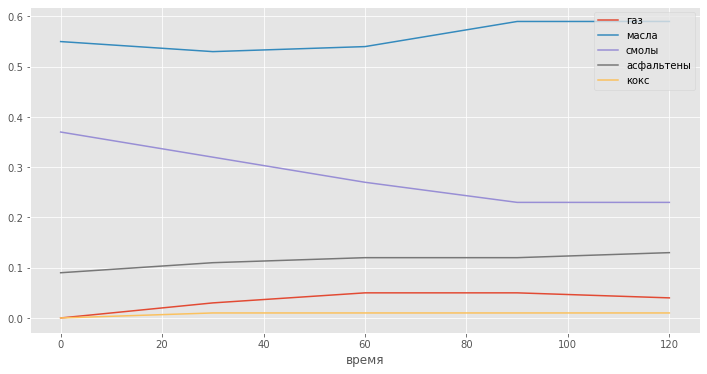

In [4]:
df_435.plot(figsize=(12,6))

In [5]:
ar1 = pd.DataFrame({'Masla_Yt': df_435['масла'], 'Smol_Yt':df_435['смолы'], 'Asvalten_Yt': df_435['асфальтены'], 'Gaz_Yt':df_435['газ'], 'Koks_Yt': df_435['кокс']})
ar1= ar1
ar1

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt,Koks_Yt
время,,,,,
0,0.55,0.37,0.09,0.00,0.00
30,0.53,0.32,0.11,0.03,0.01
60,0.54,0.27,0.12,0.05,0.01
90,0.59,0.23,0.12,0.05,0.01
120,0.59,0.23,0.13,0.04,0.01


### 1) ARIMA для масла

In [6]:
src_data_model =ar1['Masla_Yt']
model1 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model1.summary())

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Masla_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  11.743
Date:                Thu, 26 Jan 2023   AIC                            -17.485
Time:                        15:38:41   BIC                            -18.657
Sample:                             0   HQIC                           -20.630
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5623      0.022     25.590      0.000       0.519       0.605
ar.L1          0.4314      0.710      0.607      0.544      -0.961       1.824
sigma2         0.0005      0.001      0.746      0.4

### 2) ARIMA для смолы

In [7]:
src_data_model = ar1['Smol_Yt']
model2 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model2.summary())

                               SARIMAX Results                                
Dep. Variable:                Smol_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   8.667
Date:                Thu, 26 Jan 2023   AIC                            -11.334
Time:                        15:38:44   BIC                            -12.506
Sample:                             0   HQIC                           -14.479
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.055      5.353      0.000       0.186       0.400
ar.L1          0.7680      0.524      1.466      0.143      -0.259       1.795
sigma2         0.0015      0.003      0.531      0.5

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 3) ARIMA для асфальтены

In [8]:
src_data_model = ar1['Asvalten_Yt']
model3 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model3.summary())

                               SARIMAX Results                                
Dep. Variable:            Asvalten_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  14.856
Date:                Thu, 26 Jan 2023   AIC                            -23.711
Time:                        15:38:47   BIC                            -24.883
Sample:                             0   HQIC                           -26.856
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1123      0.015      7.467      0.000       0.083       0.142
ar.L1          0.6398      0.521      1.228      0.219      -0.381       1.661
sigma2         0.0001      0.000      0.545      0.5

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 4) ARIMA для кокса

In [9]:
src_data_model = ar1['Koks_Yt']
model4 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model4.summary())

                               SARIMAX Results                                
Dep. Variable:                Koks_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  20.524
Date:                Thu, 26 Jan 2023   AIC                            -35.048
Time:                        15:38:54   BIC                            -36.220
Sample:                             0   HQIC                           -38.193
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.184      0.044      0.965      -0.352       0.368
ar.L1         -0.0526      9.682     -0.005      0.996     -19.030      18.924
sigma2       1.59e-05      0.001      0.017      0.9

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 5) ARIMA для газ

In [10]:
src_data_model = ar1['Gaz_Yt']
model5 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model5.summary())

                               SARIMAX Results                                
Dep. Variable:                 Gaz_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  13.214
Date:                Thu, 26 Jan 2023   AIC                            -20.427
Time:                        15:39:17   BIC                            -21.599
Sample:                             0   HQIC                           -23.572
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0299      0.016      1.844      0.065      -0.002       0.062
ar.L1          0.5117      0.603      0.849      0.396      -0.669       1.693
sigma2         0.0003      0.000      0.730      0.4

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Константы

In [11]:
# c = 0.5310, 0.1491, 0.0800
# c = pd.DataFrame(c)
c = pd.DataFrame({'Masla_Yt' :  0.5623 , 'Smol_Yt': 0.2931, 'Asvalten_Yt': 0.1123, 'Koks_Yt': 0.0081, 'Gaz_Yt': 0.0299}, index = [0])
c

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
0,0.5623,0.2931,0.1123,0.0081,0.0299


### Предсказания для моделей ARIMA(масла, смолы, асфальтен, кокс)

In [12]:
predict1 = model1.predict(n_periods=7)
predict1 = predict1.values
predict2 = model2.predict(n_periods=7)
predict2 = predict2.values
predict3 = model3.predict(n_periods=7)
predict3 = predict3.values
predict4 = model4.predict(n_periods=7)
predict4 = predict4.values
predict5 = model5.predict(n_periods=7)
predict5 = predict5.values
ar2 = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': predict3, 'Koks_Yt': predict4,'Gaz_Yt':predict5 },index = [150,180,210,240,270] )
ar2

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
150,0.562327,0.293111,0.112334,0.008056,0.029860
180,0.557009,0.352164,0.098045,0.008480,0.014580
210,0.548380,0.313763,0.110841,0.007953,0.029932
240,0.552695,0.275361,0.117238,0.007953,0.040166
270,0.574266,0.244640,0.117238,0.007953,0.040166


<AxesSubplot:>

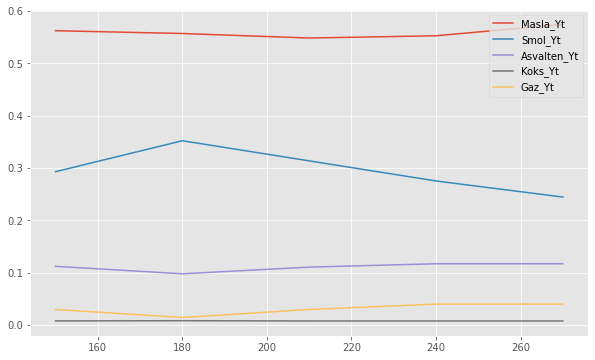

In [13]:
ar2.plot(figsize=(10,6))

## 1) Реализация уравнения для Газа

In [20]:
Gaz_Yt = (ar2['Masla_Yt']**(1.6)) + (ar2['Smol_Yt']**(1.6)) +(ar2['Asvalten_Yt']**(1.6))
Gaz_Yt
ar_Gaz_Yt = pd.DataFrame({'Masla_Yt': ar2['Masla_Yt'], 'Smol_Yt':ar2['Smol_Yt'], 'Asvalten_Yt': ar2['Asvalten_Yt'], 'Gaz_Yt': Gaz_Yt },index = [150,180,210,240,270] )
ar_Gaz_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt
150,0.562327,0.293111,0.112334,0.568710
180,0.557009,0.352164,0.098045,0.604697
210,0.548380,0.313763,0.110841,0.568544
240,0.552695,0.275361,0.117238,0.546646
270,0.574266,0.244640,0.117238,0.549207


<AxesSubplot:>

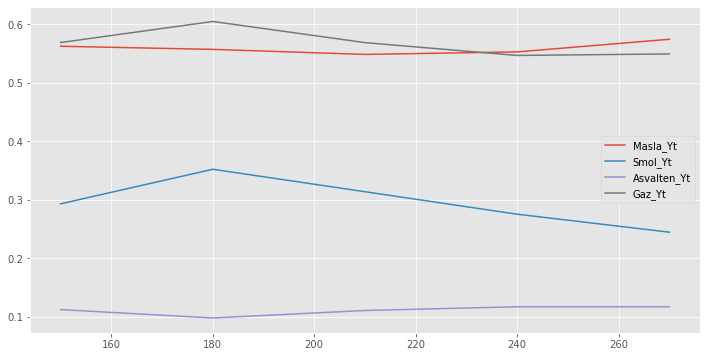

In [21]:
ar_Gaz_Yt.plot(figsize=(12,6))

### Тесты модели Газа

In [22]:
sigma = mean_squared_error(ar1['Gaz_Yt'],ar_Gaz_Yt['Gaz_Yt'])

absolute_error = mean_absolute_error(ar1['Gaz_Yt'], ar_Gaz_Yt['Gaz_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Gaz_Yt'].values
z = ar_Gaz_Yt['Gaz_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.28570892266400405
АО : 0.5335608061722522
Стандарт.относит.откл. : 18.80189048890451


## 2) Реализация уравнения для Асфалтена

In [23]:
Asv_Yt = (ar2['Masla_Yt']**(1.6)) + (ar2['Smol_Yt']**(1.6))

ar_Asv_Yt = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': Asv_Yt},index = [150,180,210,240,270] )
ar_Asv_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt
150,0.562327,0.293111,0.538454
180,0.557009,0.352164,0.580359
210,0.548380,0.313763,0.538929
240,0.552695,0.275361,0.514248
270,0.574266,0.244640,0.516810


<AxesSubplot:>

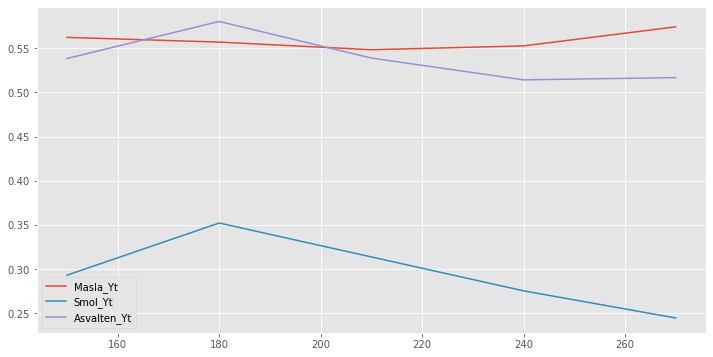

In [24]:
ar_Asv_Yt.plot(figsize=(12,6))

### Тесты модели Асфалтена

In [25]:
sigma = mean_squared_error(ar1['Asvalten_Yt'],ar_Asv_Yt['Asvalten_Yt'])

absolute_error = mean_absolute_error(ar1['Asvalten_Yt'], ar_Asv_Yt['Asvalten_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Asvalten_Yt'].values
z = ar_Asv_Yt['Asvalten_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.18058059831287637
АО : 0.4237598763452205
Стандарт.относит.откл. : 15.76018944459826


## 3) Реализация уравнения для Кокс

In [26]:
Koks_Yt = (ar2['Asvalten_Yt']**(1.6)) + (ar2['Gaz_Yt']**(1.6))

ar_Koks_Yt = pd.DataFrame({'Koks_Yt': Koks_Yt, 'Asvalten_Yt' : ar2['Asvalten_Yt'],'Gaz_Yt': ar2['Gaz_Yt']},index = [150,180,210,240,270] )
ar_Koks_Yt

,Koks_Yt,Asvalten_Yt,Gaz_Yt
150,0.033888,0.112334,0.029860
180,0.025491,0.098045,0.014580
210,0.033261,0.110841,0.029932
240,0.038234,0.117238,0.040166
270,0.038234,0.117238,0.040166


<AxesSubplot:>

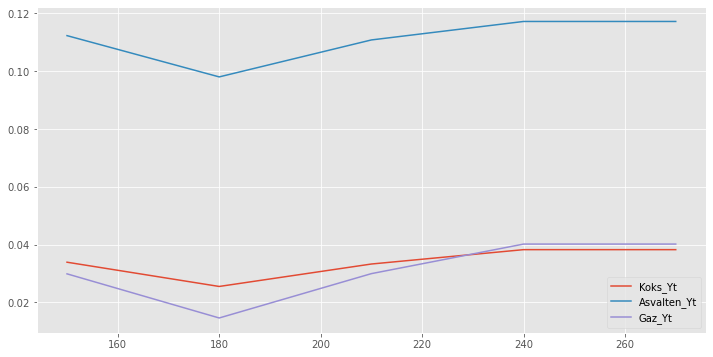

In [27]:
ar_Koks_Yt.plot(figsize=(12,6))

### Тесты модели Кокс

In [28]:
sigma = mean_squared_error(ar1['Koks_Yt'],ar_Koks_Yt['Koks_Yt'])

absolute_error = mean_absolute_error(ar1['Koks_Yt'], ar_Koks_Yt['Koks_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Koks_Yt'].values
z = ar_Koks_Yt['Koks_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.0007047661177684916
АО : 0.02582189264758152
Стандарт.относит.откл. : 15.26933629447727


## 4) Реализация уравнения для Масла

In [29]:
Masla_Yt = ((ar2['Asvalten_Yt'])**(1)) + ((ar2['Smol_Yt'])**(1))
Masla_Yt
ar_Masla_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :ar2['Smol_Yt'] },index = [150,180,210,240,270] )
ar_Masla_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.405444,0.112334,0.293111
180,0.450209,0.098045,0.352164
210,0.424603,0.110841,0.313763
240,0.392599,0.117238,0.275361
270,0.361878,0.117238,0.244640


<AxesSubplot:>

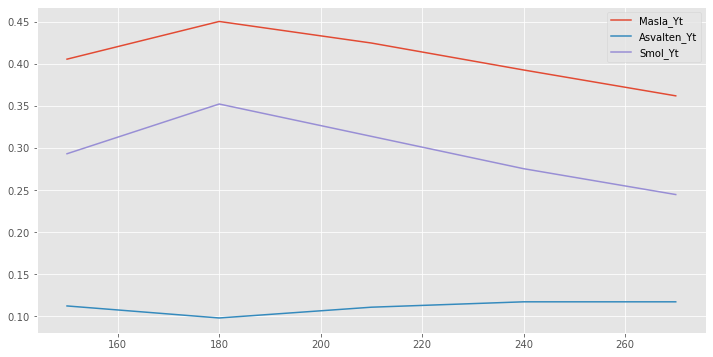

In [30]:
ar_Masla_Yt.plot(figsize=(12,6))

### Тест Масла

In [32]:
sigma = mean_squared_error(ar1['Masla_Yt'],ar_Masla_Yt['Masla_Yt'])

absolute_error = mean_absolute_error(ar1['Masla_Yt'], ar_Masla_Yt['Masla_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Masla_Yt'].values
z = ar_Masla_Yt['Masla_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.026317188213285835
АО : 0.1530531275197077
Стандарт.относит.откл. : 7.522020090085337


## 5) Реализация уравнения для Смолы

In [41]:
Smol_Yt = ((ar2['Masla_Yt'])**(1.6)) + ((ar2['Asvalten_Yt'])**(1.6))
Smol_Yt
ar_Smol_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :Smol_Yt },index = [150,180,210,240,270] )
ar_Smol_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.405444,0.112334,0.428347
180,0.450209,0.098045,0.416422
210,0.424603,0.110841,0.412027
240,0.392599,0.117238,0.419634
270,0.361878,0.117238,0.444098


<AxesSubplot:>

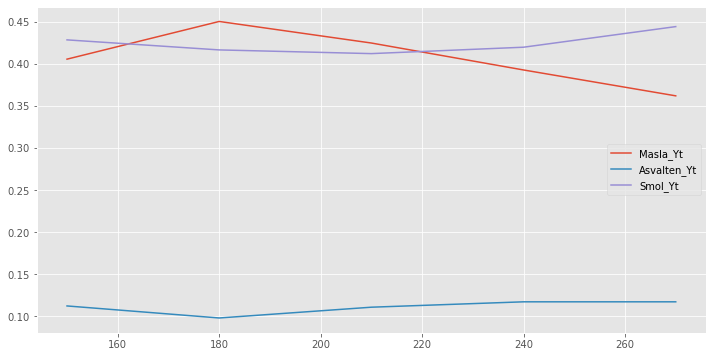

In [42]:
ar_Smol_Yt.plot(figsize=(12,6))

### Тест Смолы

In [43]:
sigma = mean_squared_error(ar1['Smol_Yt'],ar_Smol_Yt['Smol_Yt'])

absolute_error = mean_absolute_error(ar1['Smol_Yt'], ar_Smol_Yt['Smol_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Smol_Yt'].values
z = ar_Smol_Yt['Smol_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.02293443824019602
АО : 0.14010565772529782
Стандарт.относит.откл. : 6.6071109957249


## Общий график реакций

<AxesSubplot:>

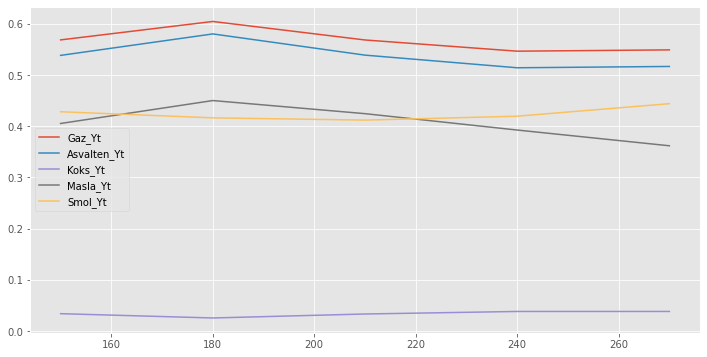

In [44]:
reakcia = pd.DataFrame({'Gaz_Yt':ar_Gaz_Yt['Gaz_Yt'], 'Asvalten_Yt': ar_Asv_Yt['Asvalten_Yt'],'Koks_Yt' :ar_Koks_Yt['Koks_Yt'],
                       'Masla_Yt': ar_Masla_Yt['Masla_Yt'],'Smol_Yt': ar_Smol_Yt['Smol_Yt'] })
reakcia.plot(figsize=(12,6))